In [1]:
# -*- coding: utf-8 -*-

import config
import pandas as pd
from utils import prophet_fit, prophet_plot, get_outliers
import numpy as np
from datetime import datetime
from tools import datacleaner as dtclean
from tools import data_visualization as dtview
from tools import dataexplore as dtexp
from evaluation import forecast_metrics as fm
from fbprophet import Prophet
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

# Offline mode
#import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import warnings

warnings.filterwarnings('ignore')
# "high resolution"
%config InlineBackend.figure_format = 'retina'
init_notebook_mode(connected=True)

imgpath=path = getattr(config,'path','default_value')

# OUTLIERS

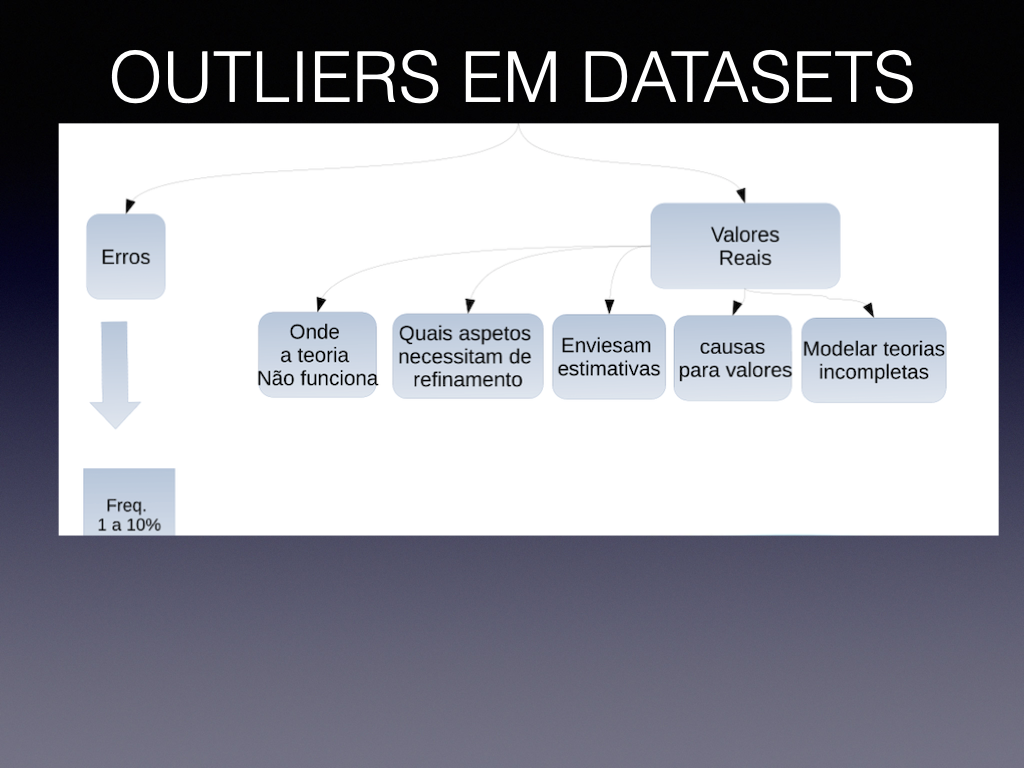

In [2]:
Image(imgpath+'/img/outlier_1.png')

# SÉRIES TEMPORAIS DE INTERVENÇÃO

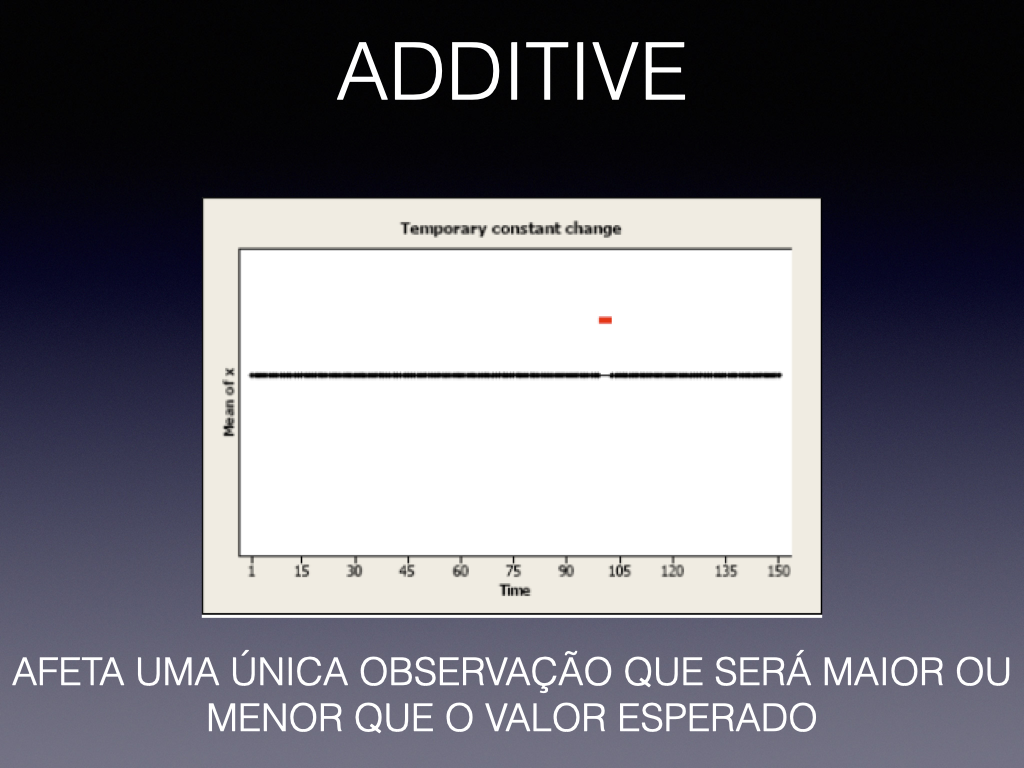

In [3]:
Image(imgpath+'/img/its_additive.png')

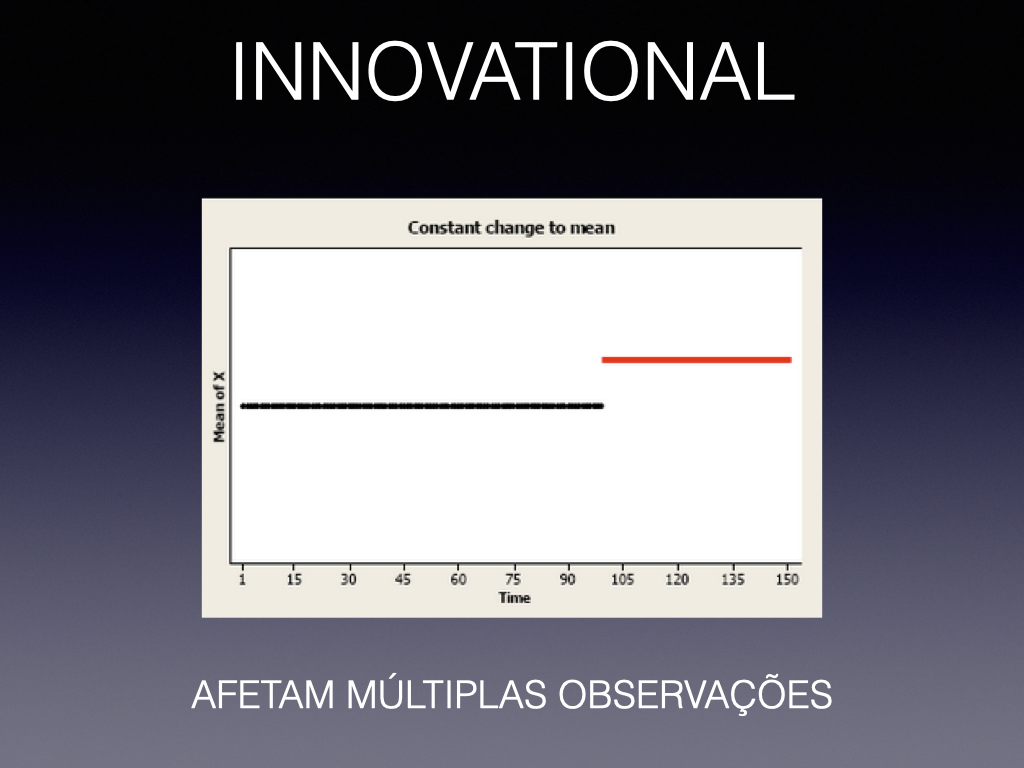

In [4]:
Image(imgpath+'/img/its_innovational.png')

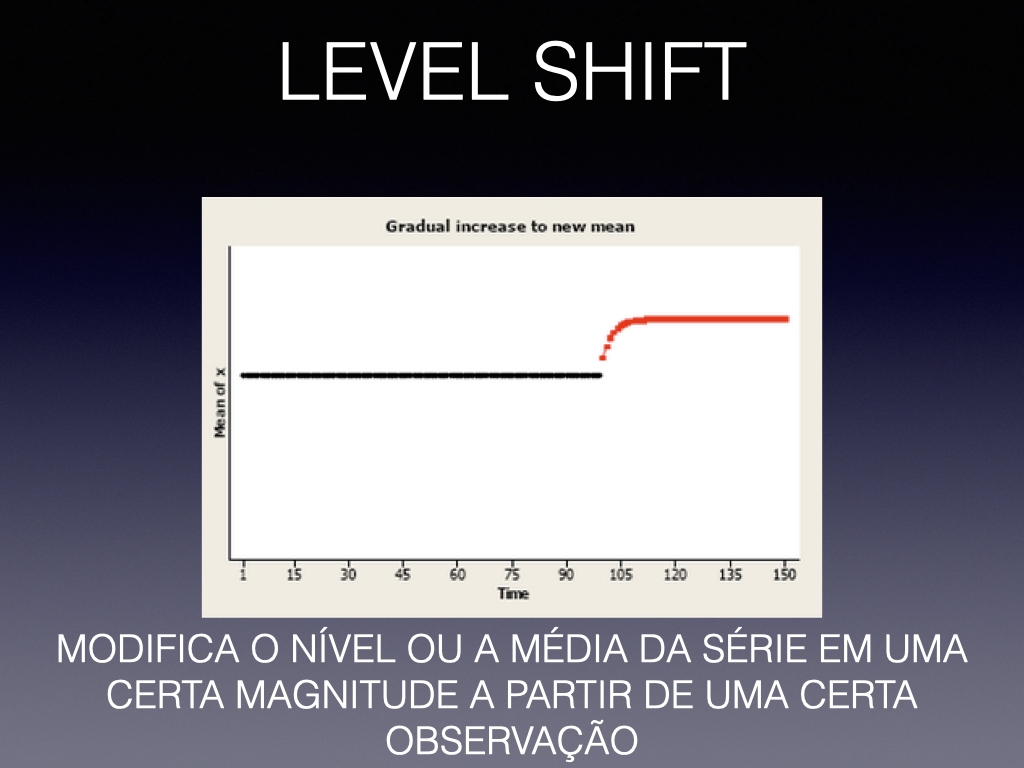

In [5]:
Image(imgpath+'/img/its_level_shift.png')

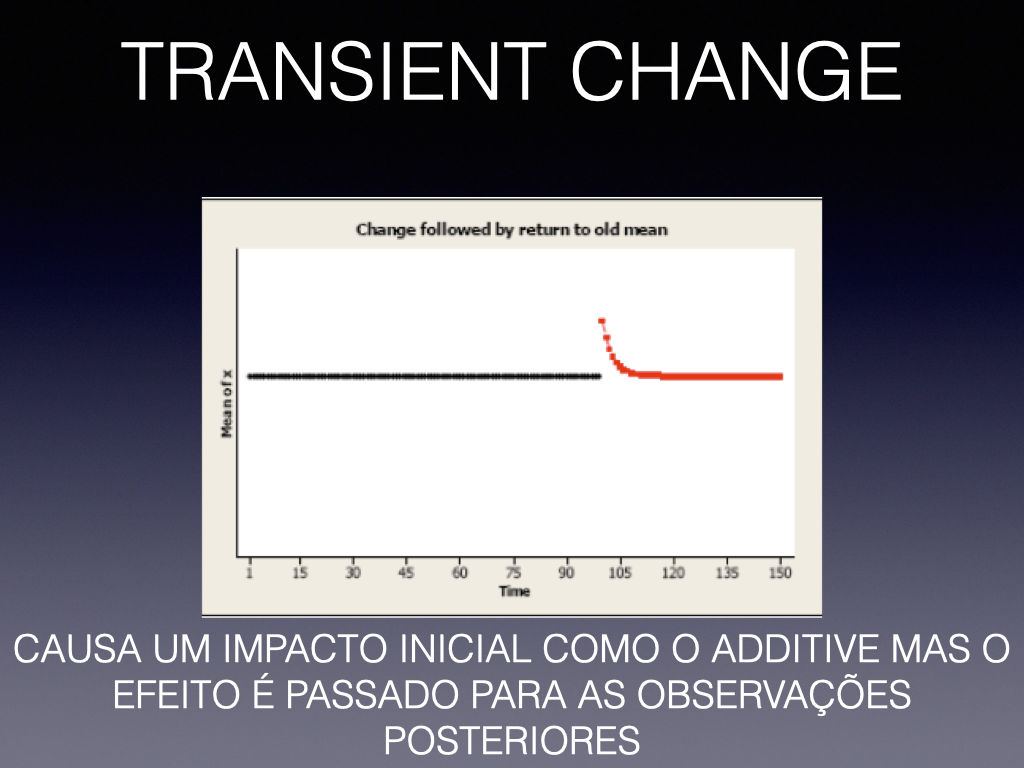

In [6]:
Image(imgpath+'/img/its_transient_change.png')


# Preparando o dataset

In [2]:
df= dtclean.prep_new_dataset(sheet_name=5,filename='/data/teste_new_ds.xlsx')
#path = getattr(config,'filepath','default_value')
df = dtclean.convert_date_time_values(df,is_datetime=False)
#Create column for the day of the week and create a new dataframe to write data into database
df['day_of_week']=df['ds'].dt.day_name()
#df_to_db = df.drop(['hora','Hour','Minute','TimeStamp'],axis=1)
df.drop(columns=['TimeStamp','Hour','Minute','hora'],inplace=True)

In [3]:
df.rename(columns={'ds':'ds_t','period':'ds'},inplace=True)
df.rename(columns={'Clients':'y'},inplace=True)
df.to_csv(path+'/data/sisqual_with_negative_values.csv')
# remove negative Units values
df_non_negative_test=dtclean.remove_df_negative_values(df)
df_non_negative_test.to_csv(path+'/data/sisqual_non_negative_values.csv')

df_non_negative_test.head()

ds  Store    ValuePLN  Units   y                ds_t day_of_week
0 2018-01-02   1027   96.019997     34  10 2018-01-02 08:30:00     Tuesday
1 2018-01-02   1027  373.140010    129  28 2018-01-02 09:00:00     Tuesday
2 2018-01-02   1027  449.030000    113  18 2018-01-02 09:30:00     Tuesday
3 2018-01-02   1027  194.480000     42  14 2018-01-02 10:00:00     Tuesday
4 2018-01-02   1027  323.579990     83  15 2018-01-02 10:30:00     Tuesday

# Análise

In [9]:

#obtendo os feriados
holiday=dtclean.get_Holiday()


<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

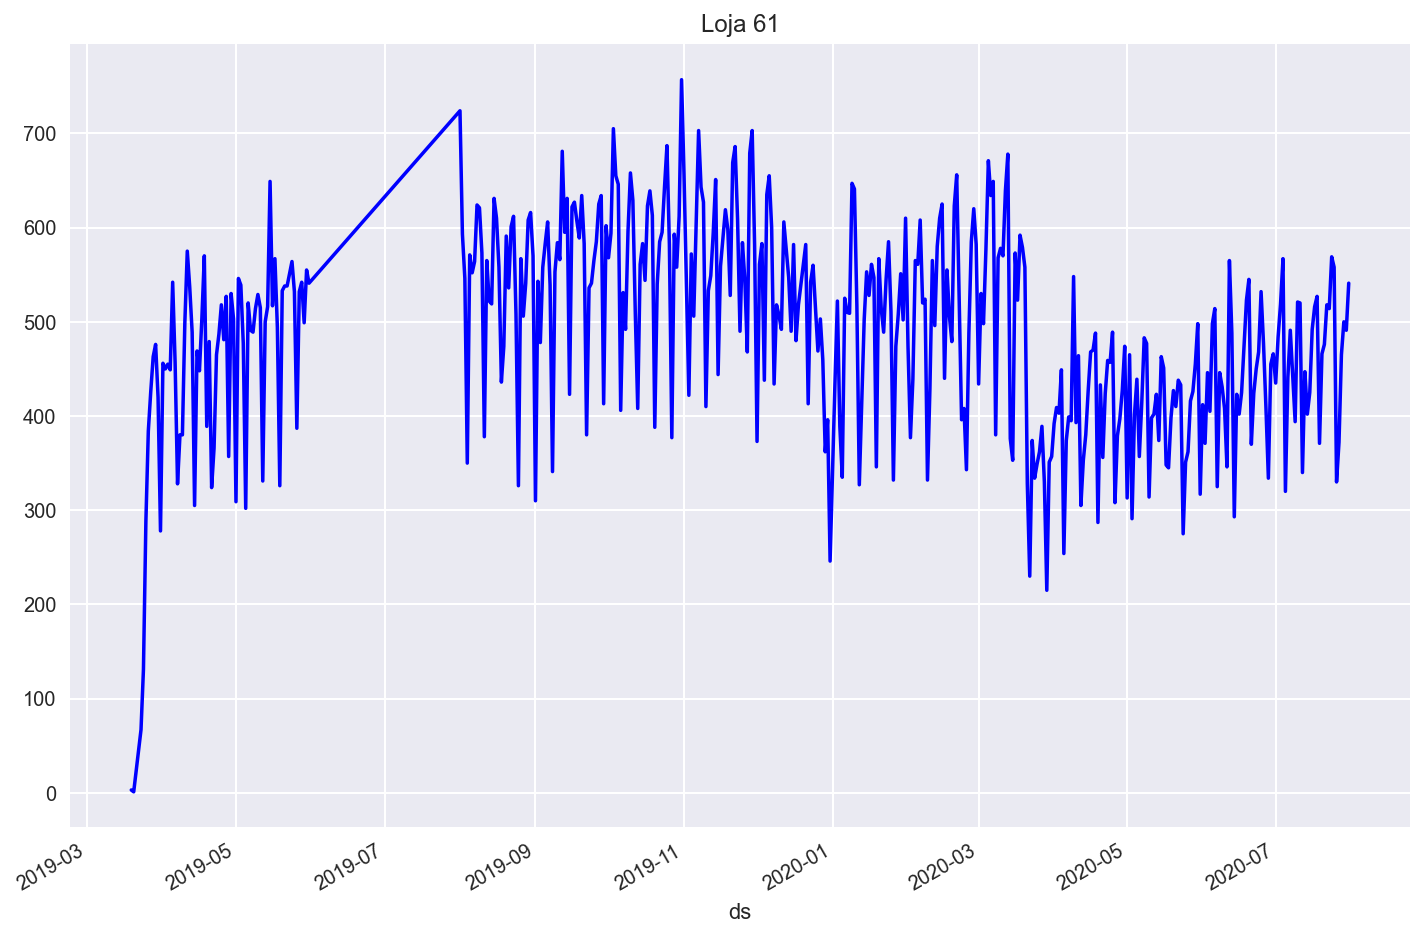

In [10]:
plt.style.use('seaborn')
plt.tight_layout()
color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
df_store_61 = df_non_negative_test.query('Store == "61"')
dtview.plot_timeseries(df_store_61,'Loja 61',color[0])

<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

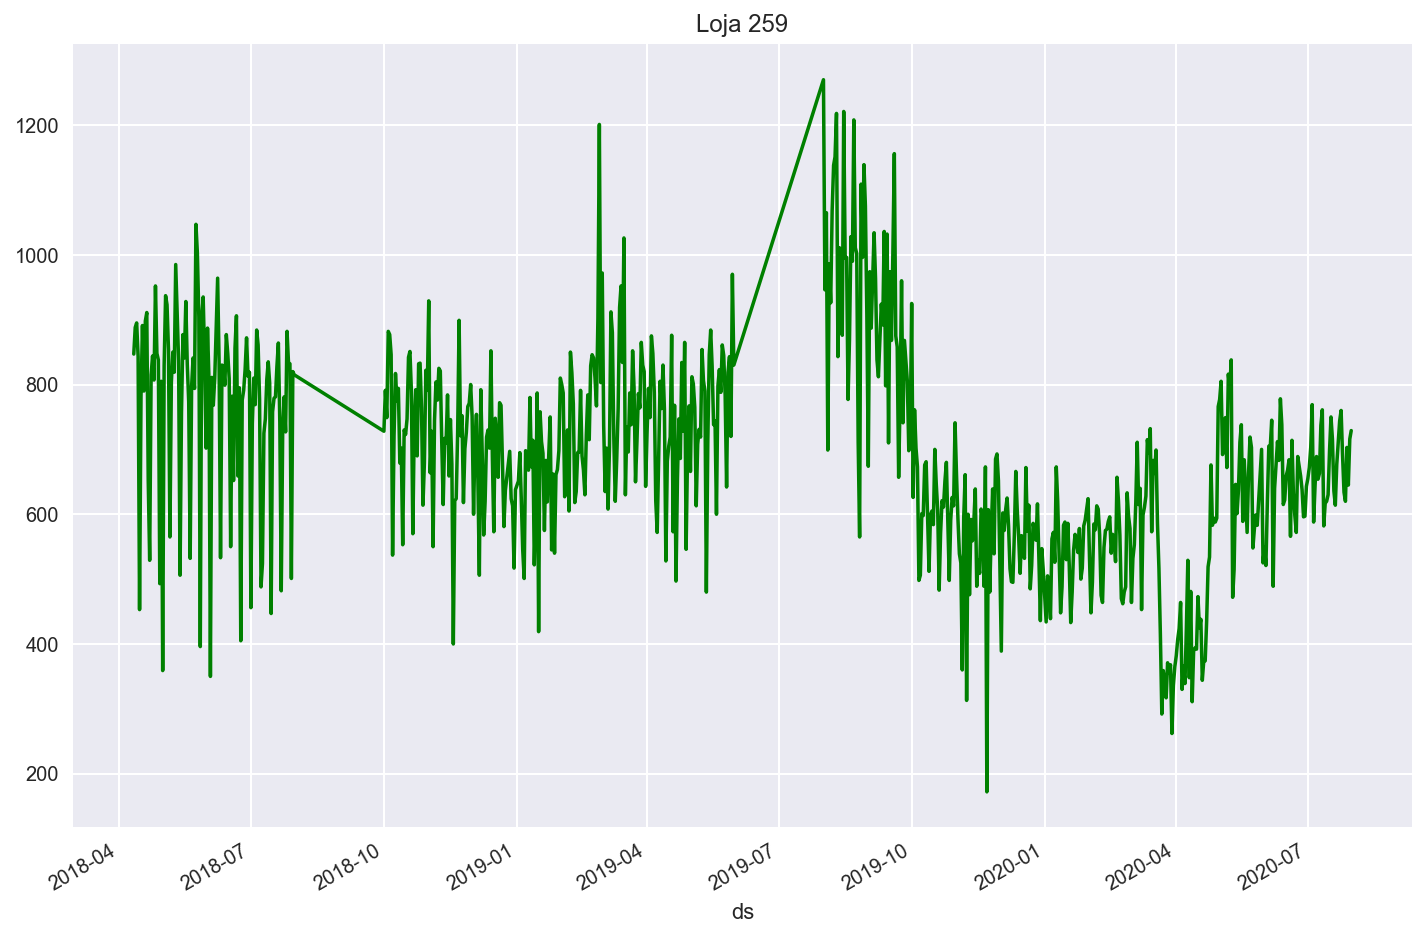

In [11]:
df_store_259 = df_non_negative_test.query('Store == "259"')
dtview.plot_timeseries(df_store_259,'Loja 259',color[1])

<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

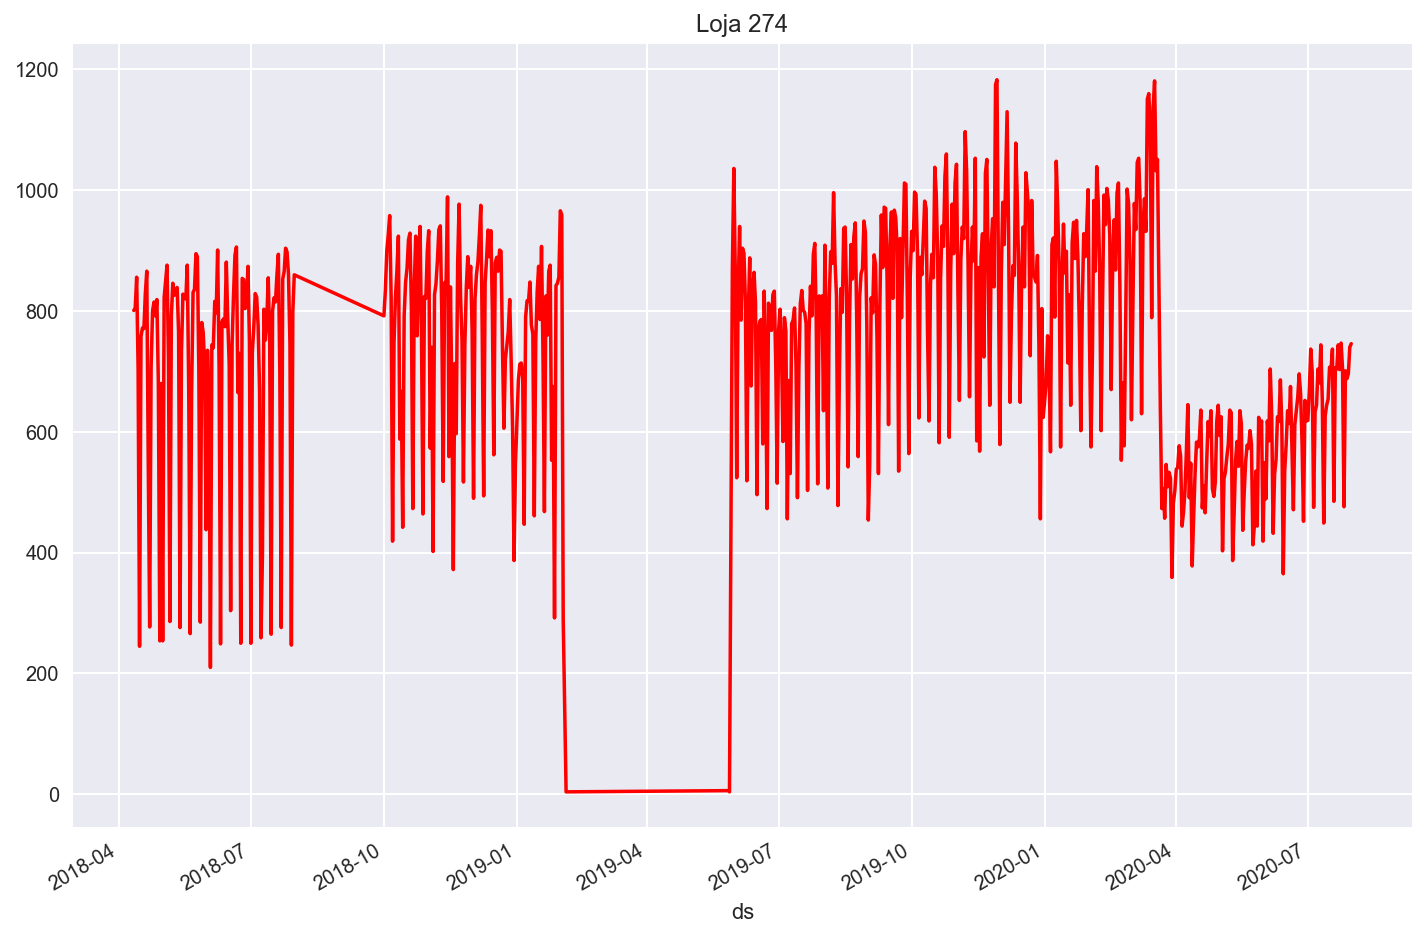

In [12]:
df_store_274 = df_non_negative_test.query('Store == "274"')
dtview.plot_timeseries(df_store_274,'Loja 274',color[2])

<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

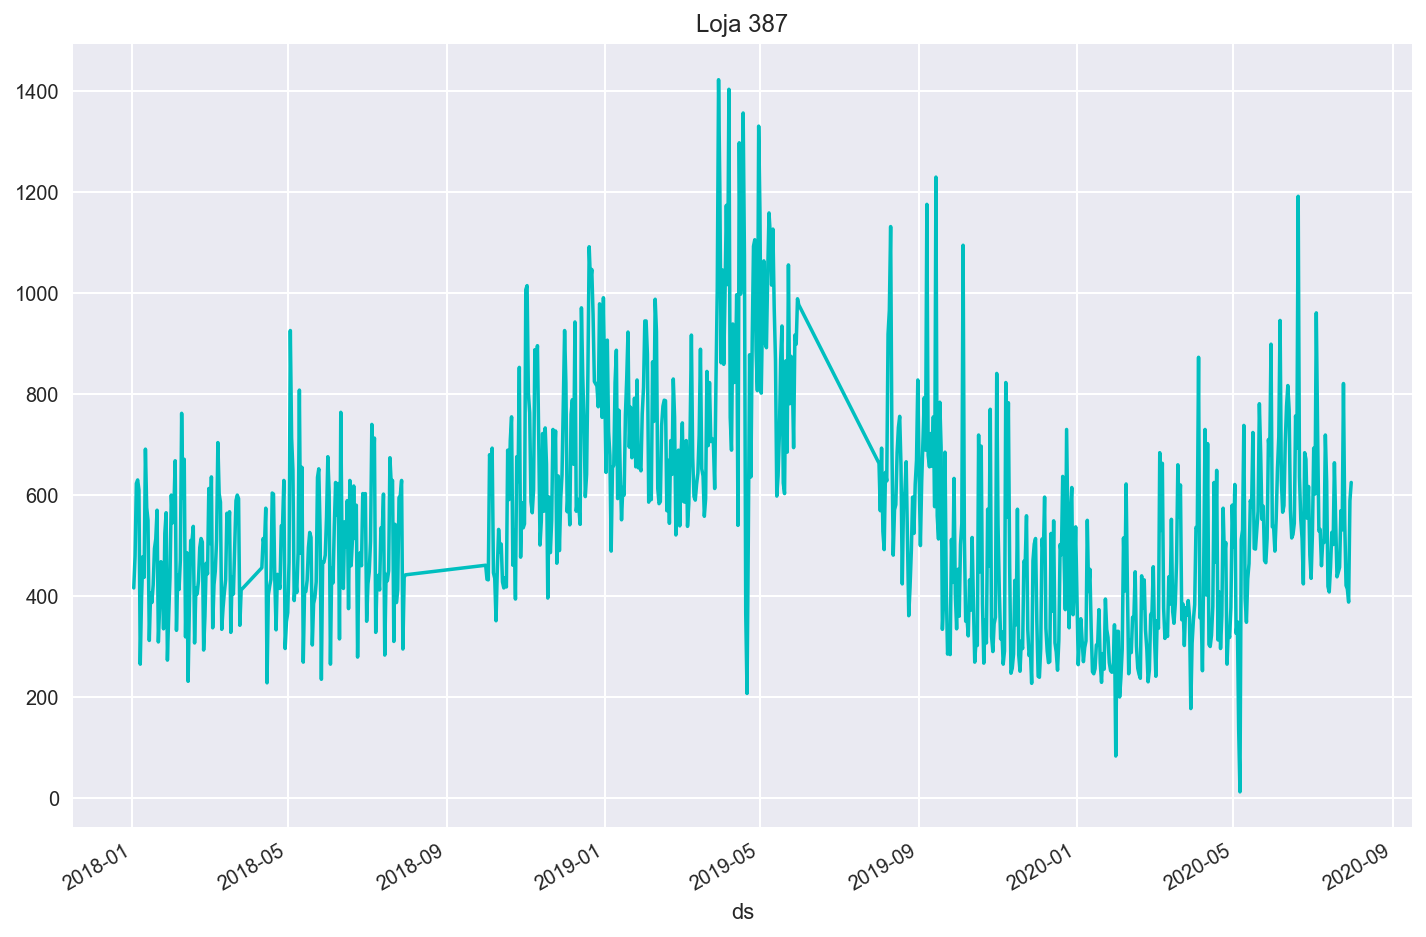

In [13]:
df_store_387 = df_non_negative_test.query('Store == "387"')
dtview.plot_timeseries(df_store_387,'Loja 387',color[3])

<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

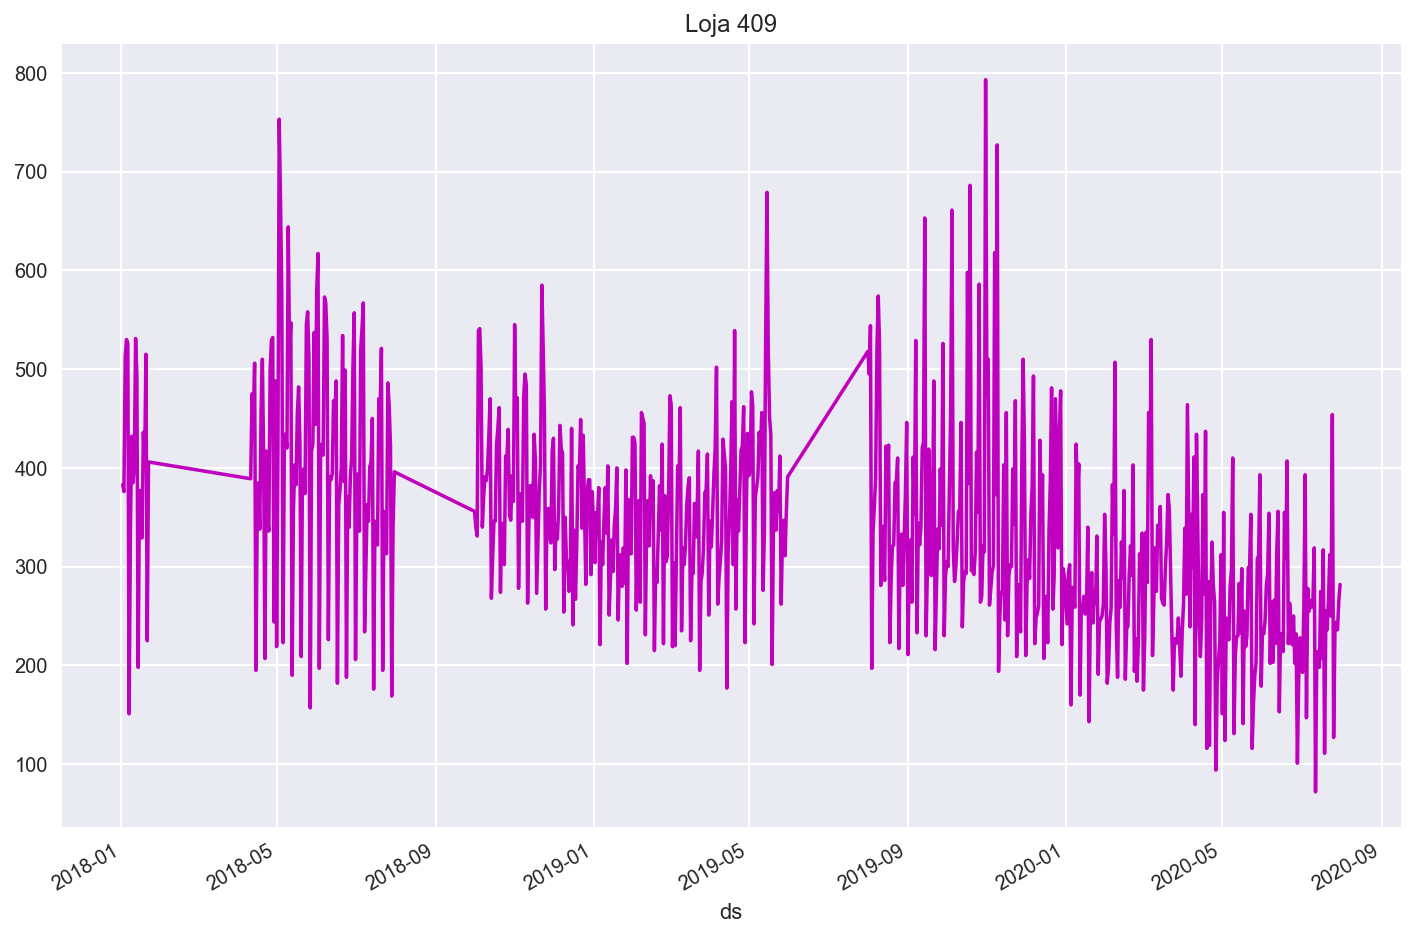

In [14]:
df_store_409 = df_non_negative_test.query('Store == "409"')
dtview.plot_timeseries(df_store_409,'Loja 409',color[4])

<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

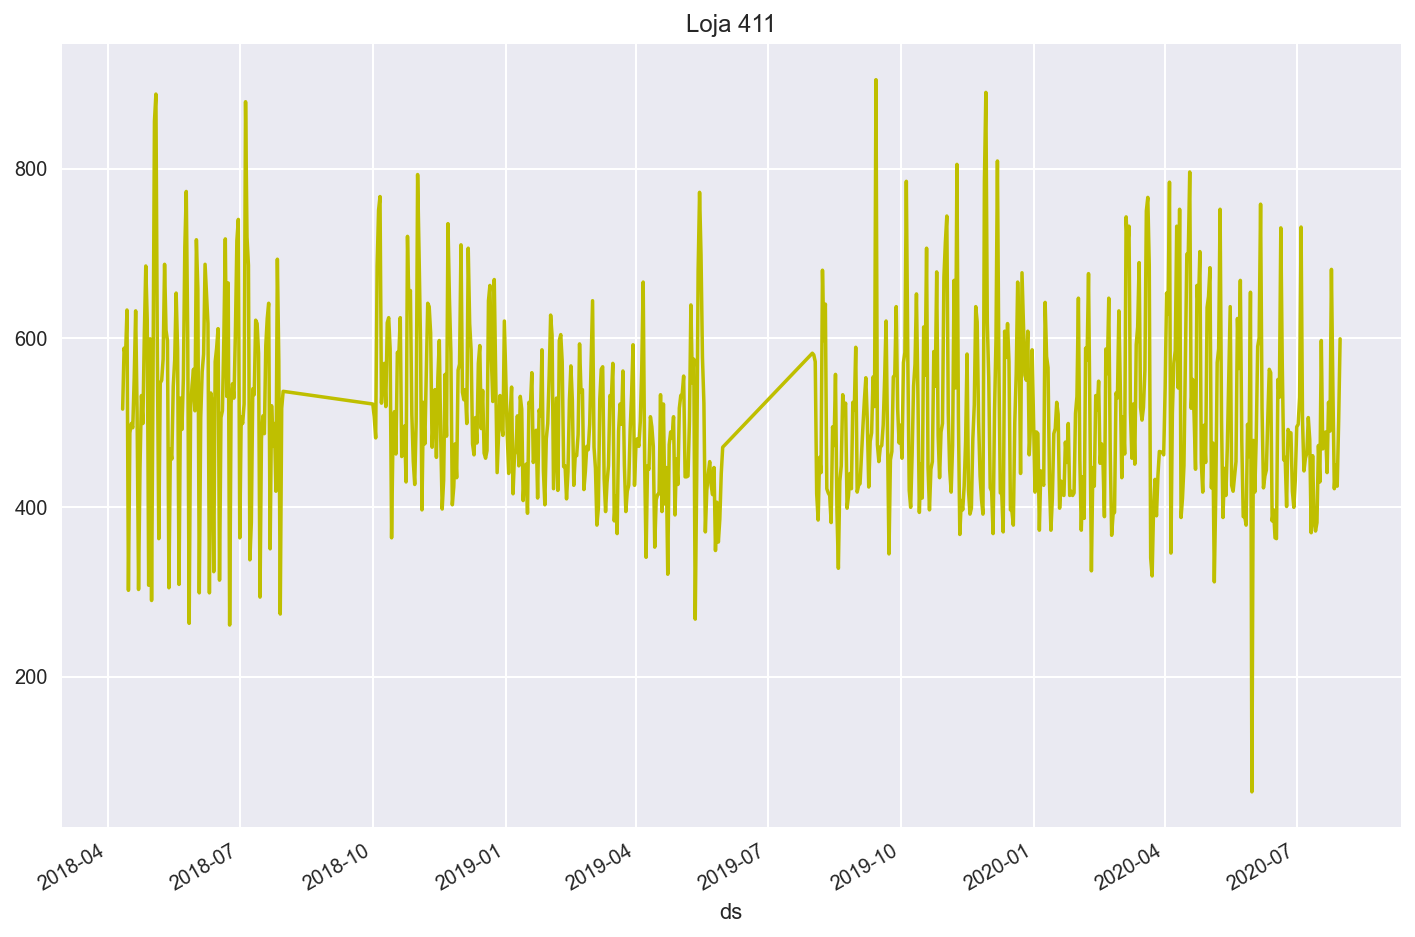

In [15]:
df_store_411 = df_non_negative_test.query('Store == "411"')
dtview.plot_timeseries(df_store_411,'Loja 411',color[5])

<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

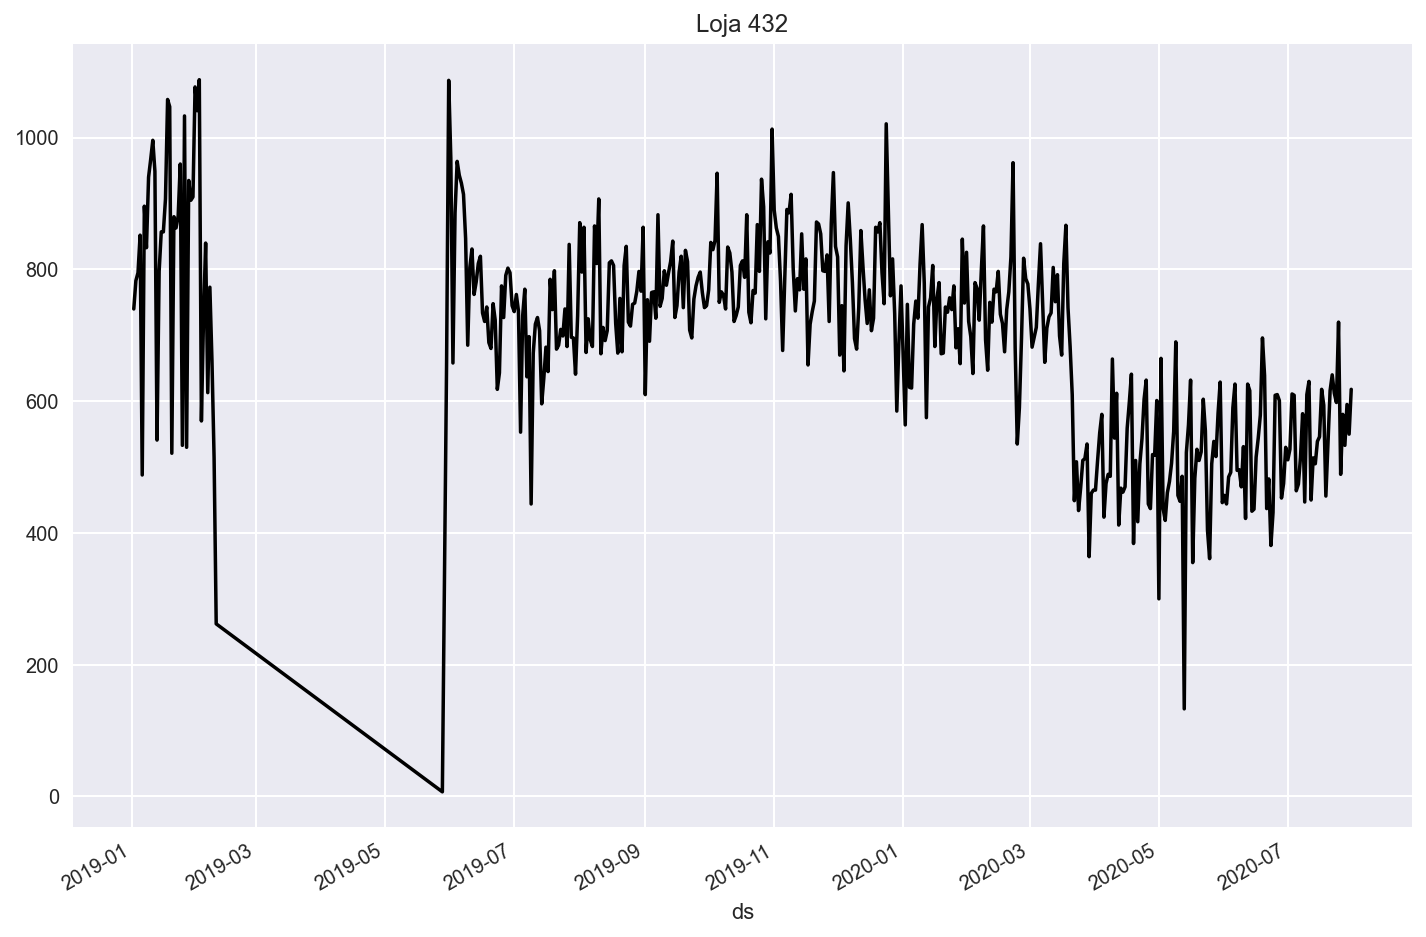

In [16]:
df_store_432 = df_non_negative_test.query('Store == "432"')
dtview.plot_timeseries(df_store_432,'Loja 432',color[6])

<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

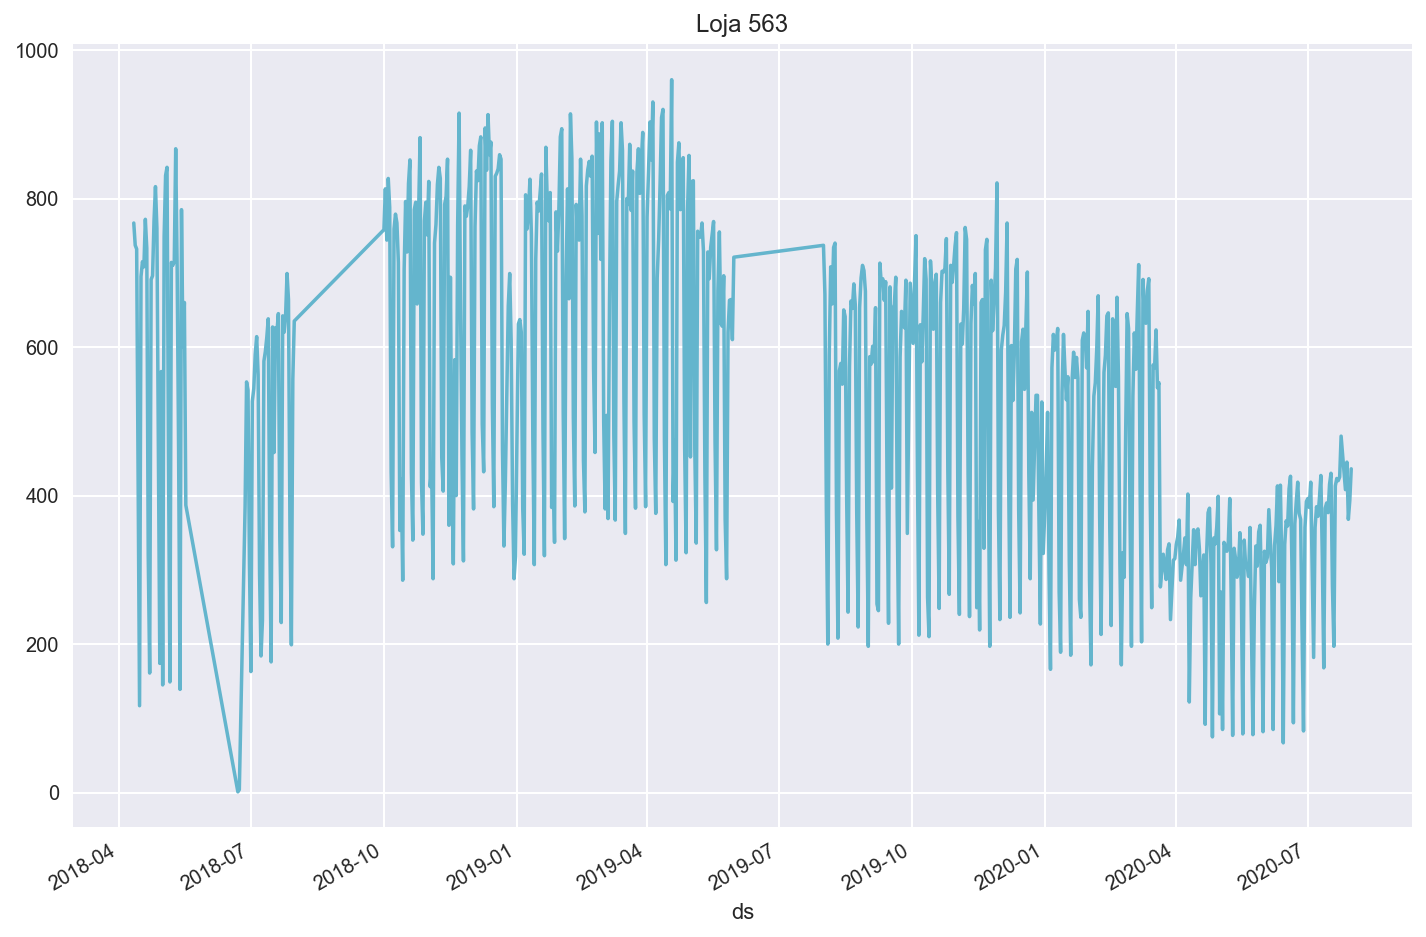

In [17]:
df_store_563 = df_non_negative_test.query('Store == "563"')
dtview.plot_timeseries(df_store_563,'Loja 563','C5')

<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

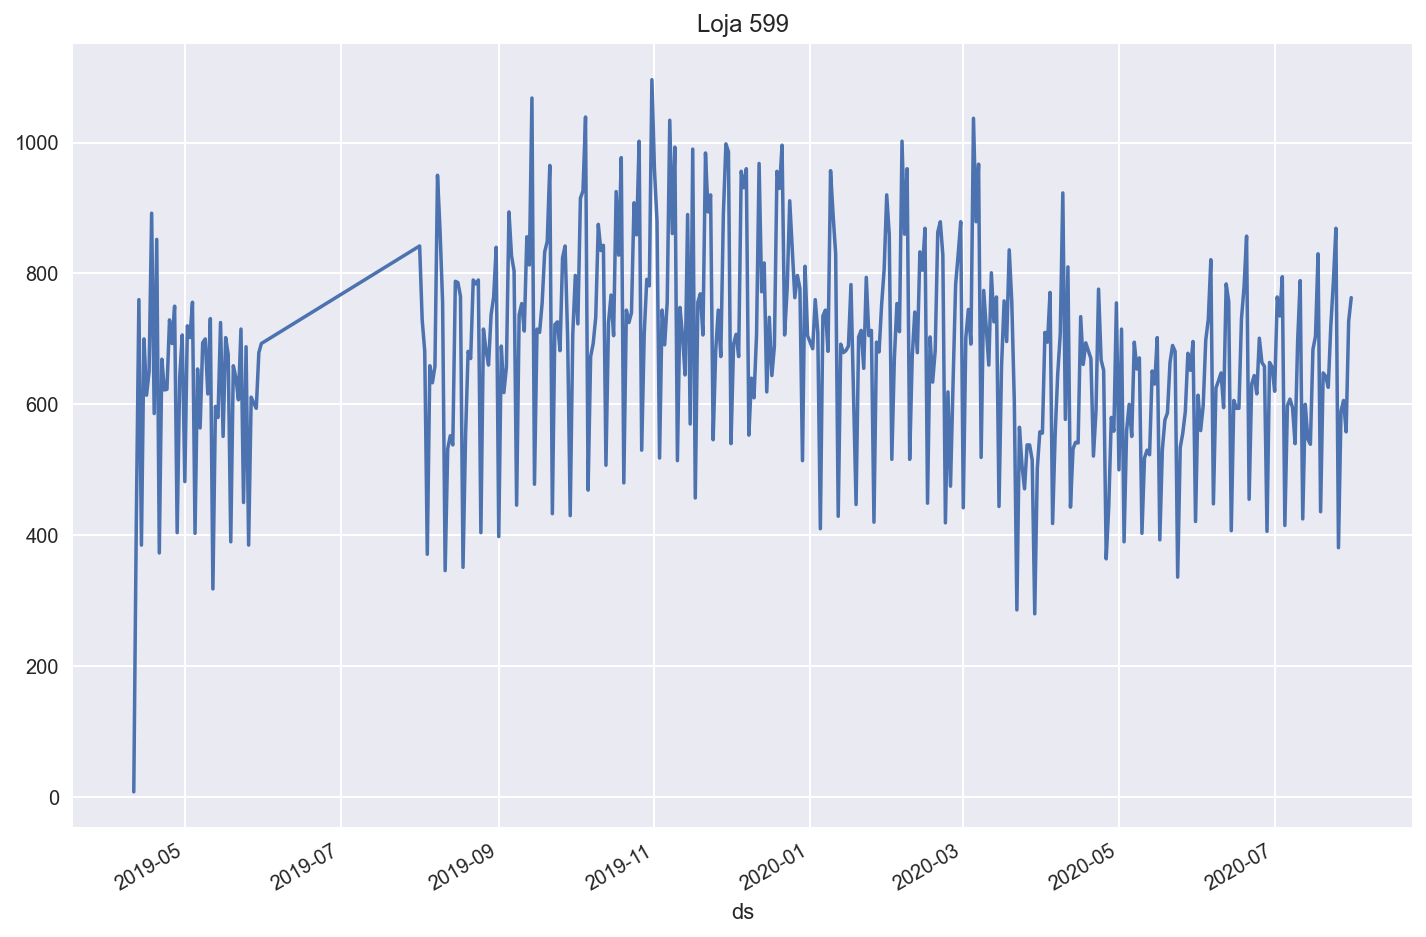

In [18]:
df_store_599 = df_non_negative_test.query('Store == "599"')
dtview.plot_timeseries(df_store_599,'Loja 599','C6')

<module 'matplotlib.pyplot' from '/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/matplotlib/pyplot.py'>

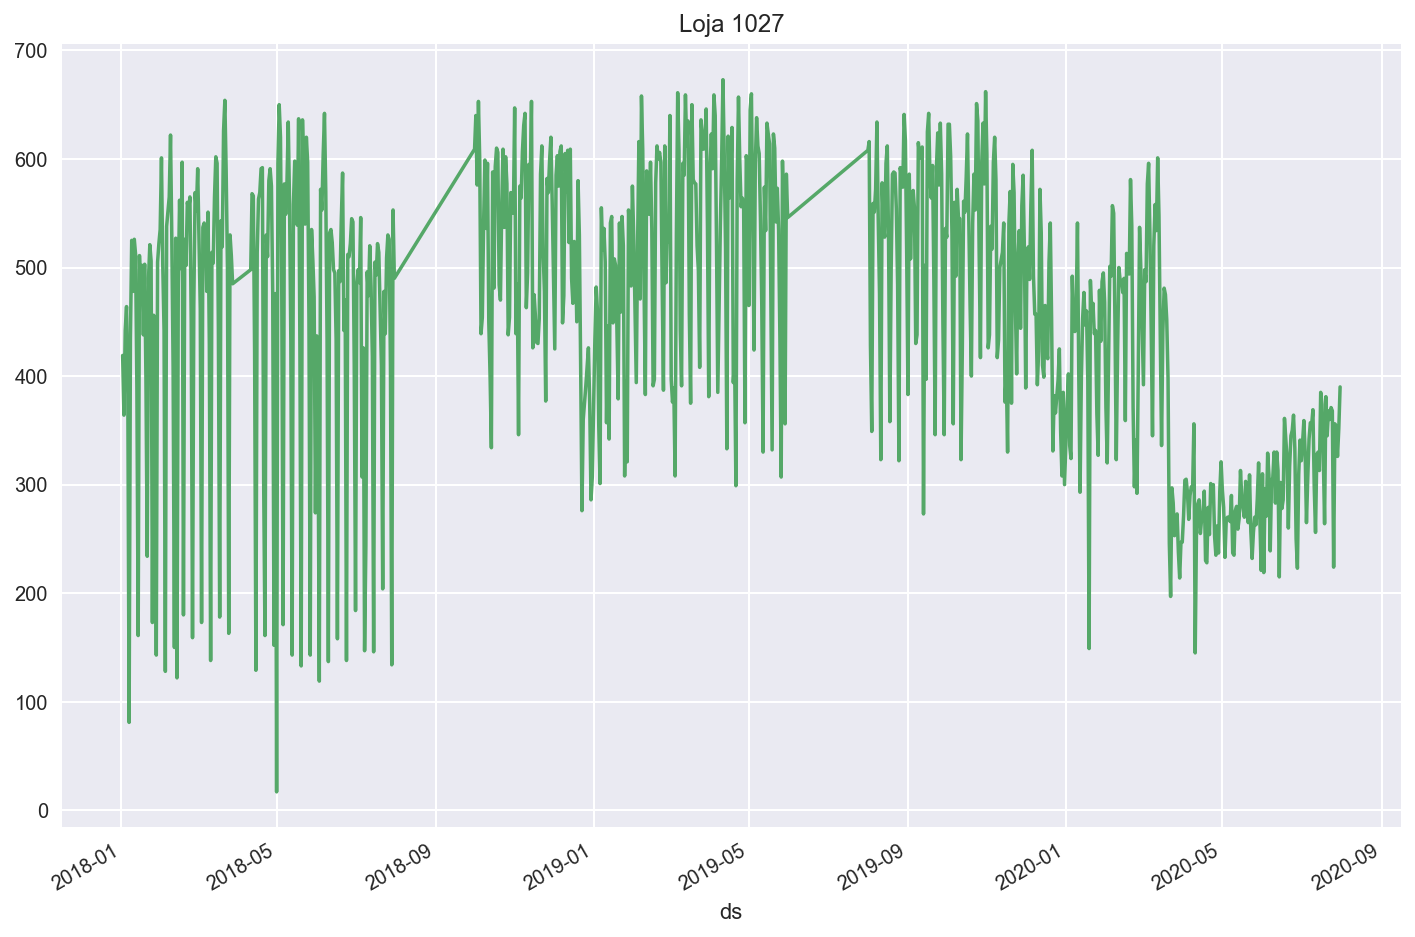

In [19]:
df_store_1027 = df_non_negative_test.query('Store == "1027"')
dtview.plot_timeseries(df_store_1027,'Loja 1027','C7')

# Análise Produtos Vendidos

In [20]:
df_store_387.rename(columns={'Clients':'y'},inplace=True)
df_store_61.rename(columns={'Clients':'y'},inplace=True)
df_store_259.rename(columns={'Clients':'y'},inplace=True)
df_store_274.rename(columns={'Clients':'y'},inplace=True)
df_store_409.rename(columns={'Clients':'y'},inplace=True)
df_store_411.rename(columns={'Clients':'y'},inplace=True)
df_store_432.rename(columns={'Clients':'y'},inplace=True)
df_store_563.rename(columns={'Clients':'y'},inplace=True)
df_store_599.rename(columns={'Clients':'y'},inplace=True)
df_store_1027.rename(columns={'Clients':'y'},inplace=True)


# Loja 274

<div class="alert alert-block alert-info">
<b>Analisamos apenas os dados da lojas 274 como exemplo de identificação de uma possível série temporal de
intervenção com duas abordagens:

+ A primeira abordagem verificamos a previsão sem tratamento de parâmetros para prever outliers de intervenção.
+ A segunda abordagem realizamos a previsão com tratamento dos parâmetros para prever outliers de intervenção.
</div>

# Previsão

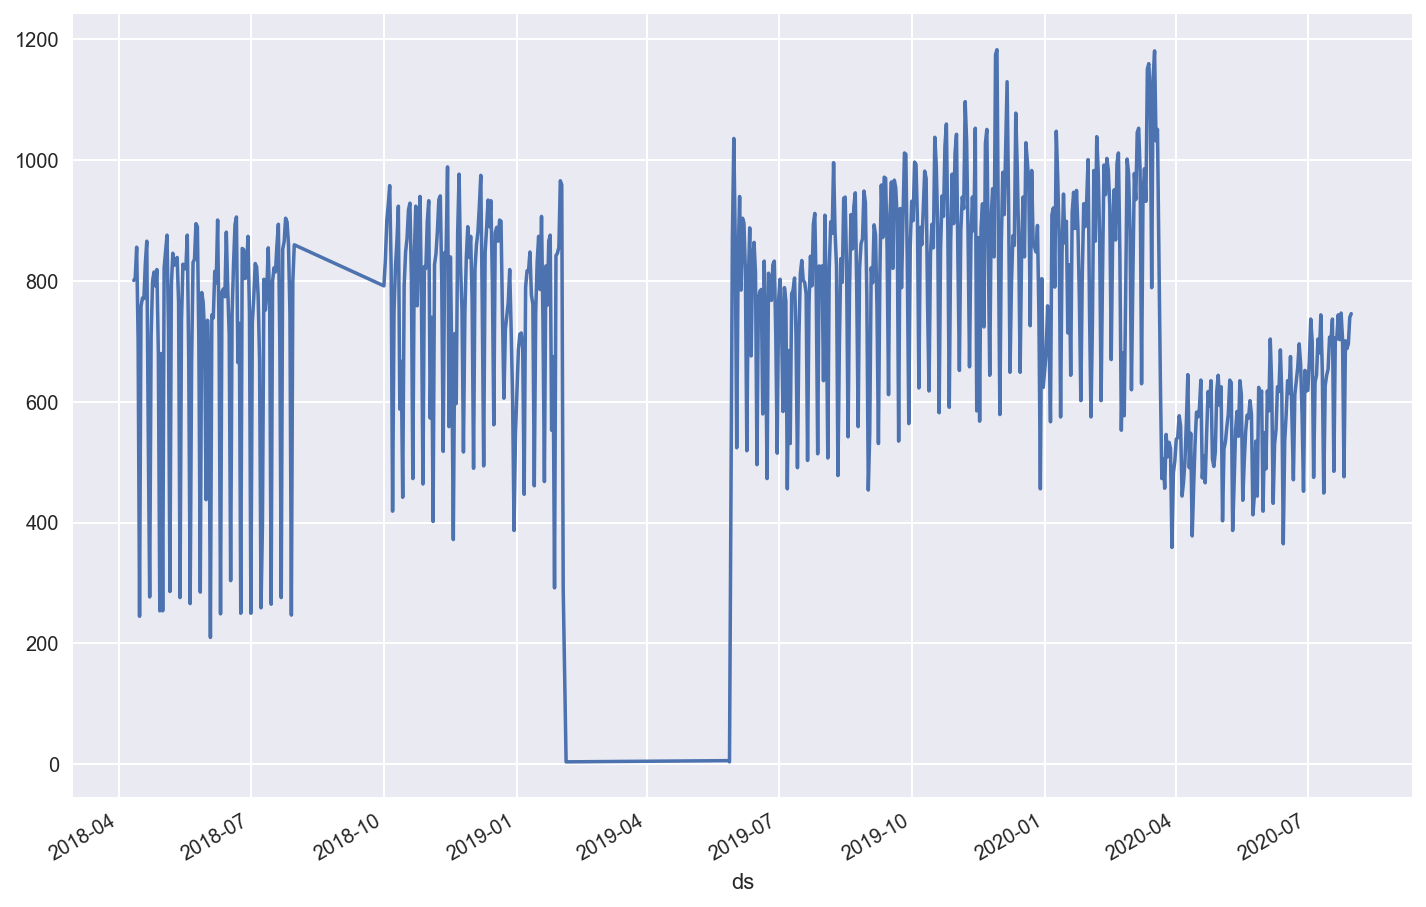

In [21]:
df_teste=df_store_274.groupby('ds').sum()
df_teste.reset_index(level=0, inplace=True)
df_teste.ds = pd.to_datetime(df_teste.ds)
df_teste.index=df_teste.ds
df_teste.y.plot(figsize=(12,8))
plt.show()

<div class="alert alert-block alert-info">
<b>Foram criados 2 datasets para descartar os intervalos de dados ausentes</b>
</div>

In [22]:
from datetime import timedelta
data_final_teste = df_store_274.ds.max() - timedelta(days=69)
df_274_sale_treino_2018, df_274_sale_teste_2018 = dtexp.configura_dataframe_treino_teste(
    df_store_274,
    inicio='2018-04-12 08:00:00',
    fim='2018-07-22 21:00:00',
    data_final='2018-08-30 21:00:00')
df_274_sale_treino_2019, df_274_sale_teste_2019 = dtexp.configura_dataframe_treino_teste(
    df_store_274,
    inicio='2018-10-01 08:00:00',
    fim='2019-01-23 21:00:00',
    data_final='2019-01-31 21:00:00')


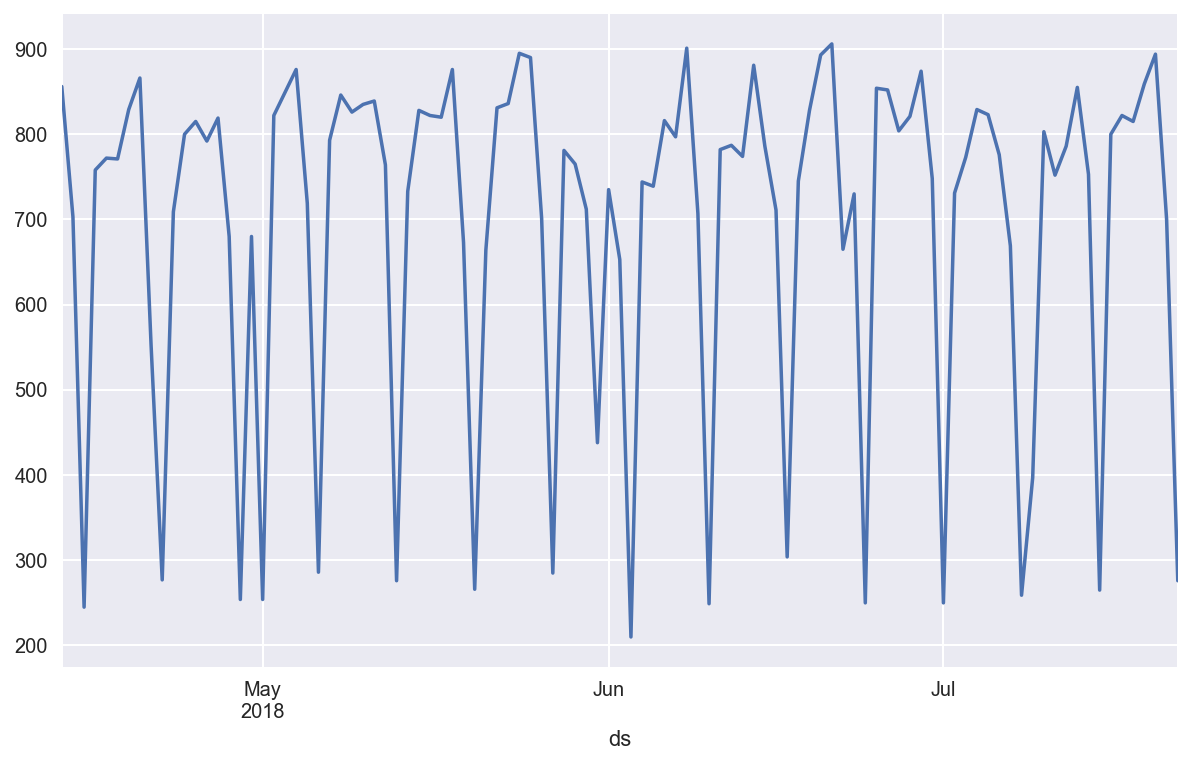

In [23]:
df_treino_2018=df_274_sale_treino_2018.groupby('ds').sum()
df_treino_2018.reset_index(level=0,inplace=True)
df_treino_2018.ds = pd.to_datetime(df_treino_2018.ds)
df_treino_2018.index = df_treino_2018.ds
df_treino_2018.y.plot(figsize=(10,6))
plt.show()

<div class="alert alert-block alert-info">
<b>Previsão de 28 dias no futuro sem parametrização ajustada</b>
</div>

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


Cutoff date:  2018-05-13 00:00:00
Treinando para o período de 2018-04-13 00:00:00 a 2018-05-12 00:00:00 (30 dias)
Previsão de 2018-05-13 00:00:00 até 2018-06-09 00:00:00 (28 dias)
=====
valor real 438 ficou fora do intervalo de previsão
intervalo: de 636.4816172278713 até 1094.5769028235284
Data: 2018-05-31


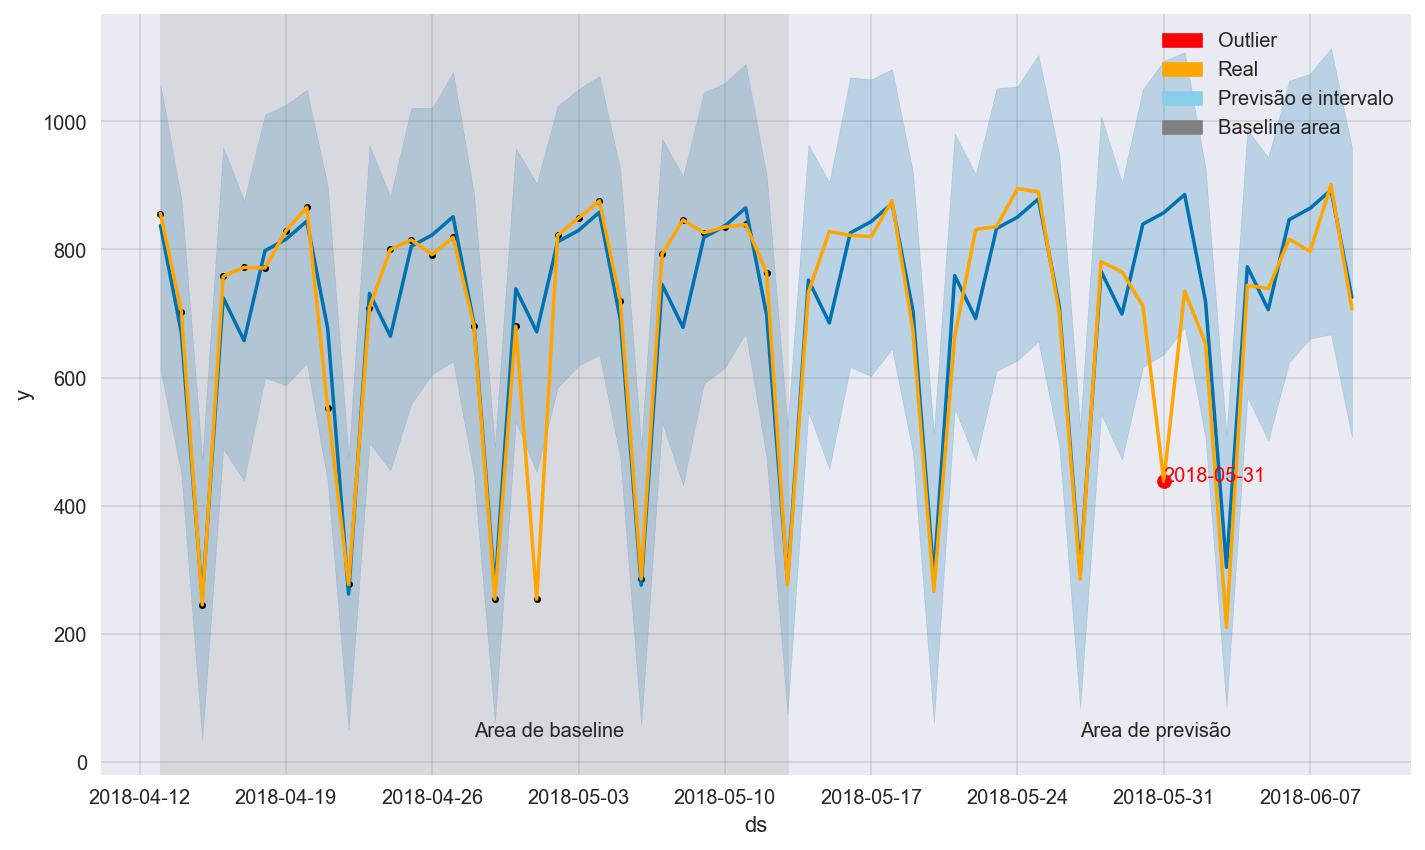

In [24]:
alpha=0.98
mdl_prophet = Prophet(interval_width=alpha,holidays=dtclean.get_Holiday(years=2018))
today_index = 30
print('Cutoff date: ', df_treino_2018.index[today_index])
predict_n = 28
fig, forecast, mdl_prophet = prophet_fit(df_treino_2018, mdl_prophet, today_index, predict_days=predict_n)
outliers, df_pred = get_outliers(df_treino_2018, forecast, today_index, predict_days=predict_n)
prophet_plot(df_treino_2018, fig, today_index, predict_days=predict_n, outliers=outliers)

# Identificando as Séries Temporais de Intervenção 

<div class="alert alert-block alert-info">
<b>Previsão de 28 dias no futuro com ajustes nos parâmetros</b>
</div>

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cutoff date:  2018-05-13 00:00:00
Treinando para o período de 2018-04-13 00:00:00 a 2018-05-12 00:00:00 (30 dias)
Previsão de 2018-05-13 00:00:00 até 2018-06-09 00:00:00 (28 dias)


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


=====
valor real 438 ficou fora do intervalo de previsão
intervalo: de 447.4545317446288 até 1057.635407401277
Data: 2018-05-31


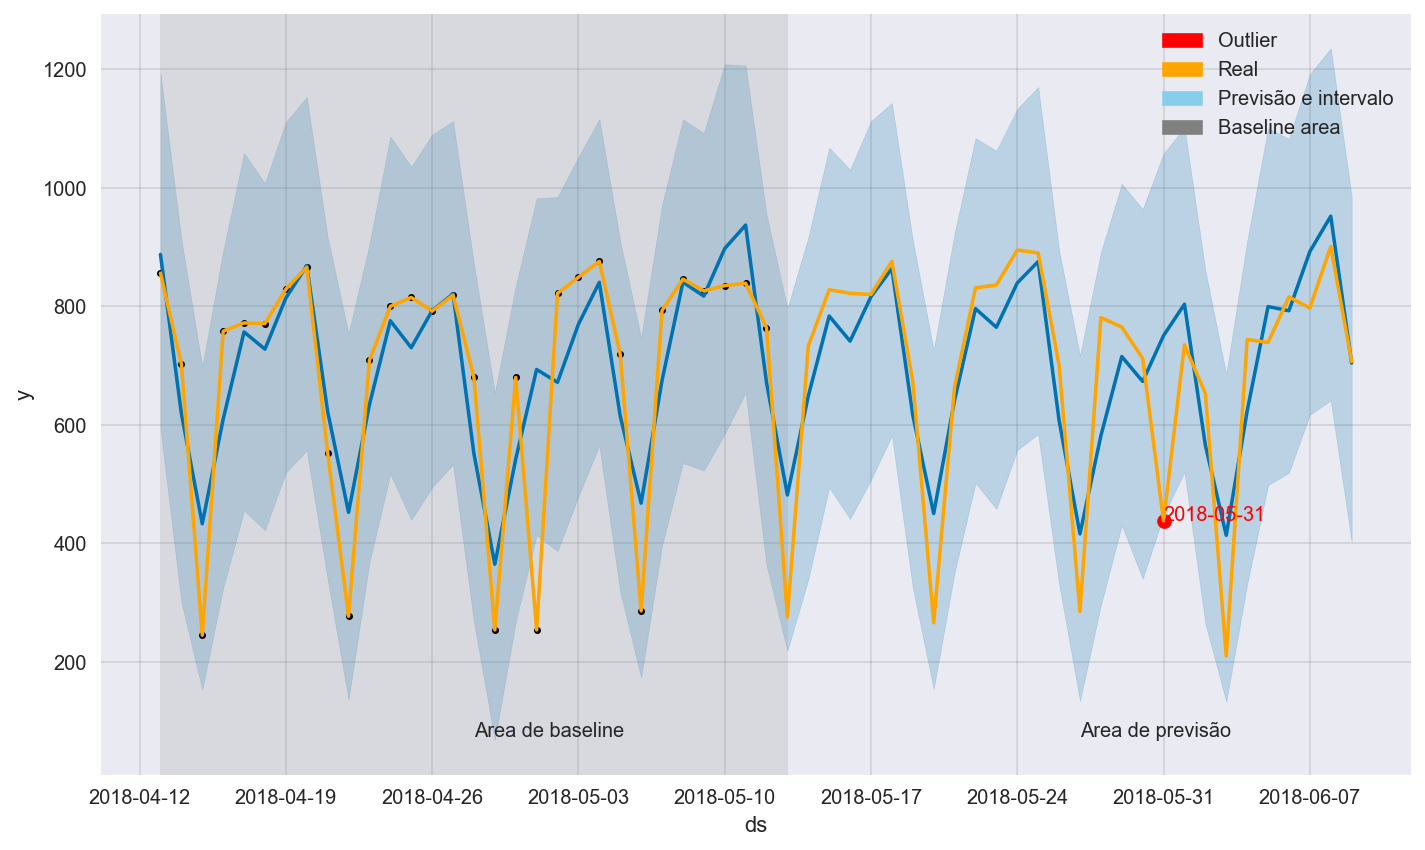

In [25]:
alpha=0.98
mdl_prophet = Prophet(interval_width=alpha,holidays=dtclean.get_Holiday(years=2018))
today_index = 30
print('Cutoff date: ', df_treino_2018.index[today_index])
mdl_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=2)
mdl_prophet.add_seasonality(name='weekly', period=7, fourier_order=2, prior_scale=0.1)
predict_n = 28
fig, forecast, mdl_prophet = prophet_fit(df_treino_2018, mdl_prophet, today_index, predict_days=predict_n)
outliers, df_pred = get_outliers(df_treino_2018, forecast, today_index, predict_days=predict_n)
prophet_plot(df_treino_2018, fig, today_index, predict_days=predict_n, outliers=outliers)

In [26]:
print('Previsões')
print(df_pred.head())
df_outlier = df_pred[(df_pred.actual > df_pred.upper_y) | (df_pred.actual < df_pred.lower_y)]
print('Outliers')
print(df_outlier.head())

Previsões
                   ds       preds     lower_y      upper_y  actual
2018-05-13 2018-05-13  481.708898  218.704798   796.596211     276
2018-05-14 2018-05-14  648.739061  339.435118   915.923281     733
2018-05-15 2018-05-15  783.608989  494.349603  1067.543208     828
2018-05-16 2018-05-16  741.283206  441.282673  1030.657004     822
2018-05-17 2018-05-17  816.255763  507.099162  1112.506743     820
Outliers
                   ds       preds     lower_y      upper_y  actual
2018-05-31 2018-05-31  750.614445  447.454532  1057.635407     438


<div class="alert alert-block alert-info">
<b>Os outliers que não foram previstos podem ter relação com algum evento inesperado que ainda não ocorreu
 na série histórica</b>
</div>

# Verificando os feriados do período

In [27]:
holiday=dtclean.get_Holiday(years=2018)
holiday['day of week']=holiday['ds'].dt.day_name()
holiday.head(30)

ds      holiday day of week
0  2018-01-01  BR-Holidays      Monday
1  2018-02-13  BR-Holidays     Tuesday
2  2018-02-14  BR-Holidays   Wednesday
3  2018-03-30  BR-Holidays      Friday
4  2018-04-01  BR-Holidays      Sunday
5  2018-04-21  BR-Holidays    Saturday
6  2018-05-01  BR-Holidays     Tuesday
7  2018-05-31  BR-Holidays    Thursday
8  2018-07-09  BR-Holidays      Monday
9  2018-09-07  BR-Holidays      Friday
10 2018-10-12  BR-Holidays      Friday
11 2018-11-02  BR-Holidays      Friday
12 2018-11-15  BR-Holidays    Thursday
13 2018-12-25  BR-Holidays     Tuesday

<div class="alert alert-block alert-info">
<b>Realizando a previsão para o 2º dataset (anos 2018/2019)</b>
</div>

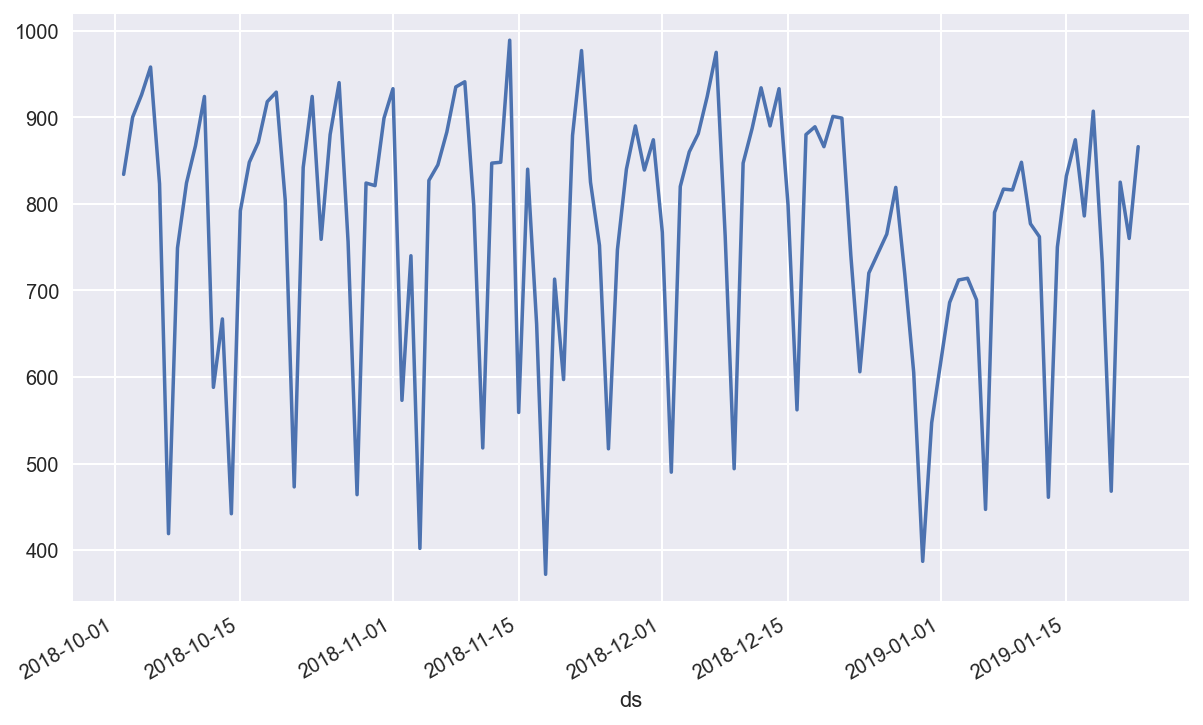

In [28]:
df_274_sale_treino_2019, df_274_sale_teste_2019
df_treino_2019=df_274_sale_treino_2019.groupby('ds').sum()
df_treino_2019.reset_index(level=0,inplace=True)
df_treino_2019.ds = pd.to_datetime(df_treino_2019.ds)
df_treino_2019.index = df_treino_2019.ds
df_treino_2019.y.plot(figsize=(10,6))
plt.show()


# Identificando as Séries Temporais de Intervenção loja 274 anos 2018/2019

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


Cutoff date:  2018-11-01 00:00:00
Treinando para o período de 2018-10-02 00:00:00 a 2018-10-31 00:00:00 (30 dias)
Previsão de 2018-11-01 00:00:00 até 2018-11-14 00:00:00 (14 dias)
=====
valor real 573 ficou fora do intervalo de previsão
intervalo: de 817.9996098497942 até 1186.5215154609607
Data: 2018-11-02
=====
valor real 402 ficou fora do intervalo de previsão
intervalo: de 468.3170209197232 até 846.5745304060283
Data: 2018-11-04


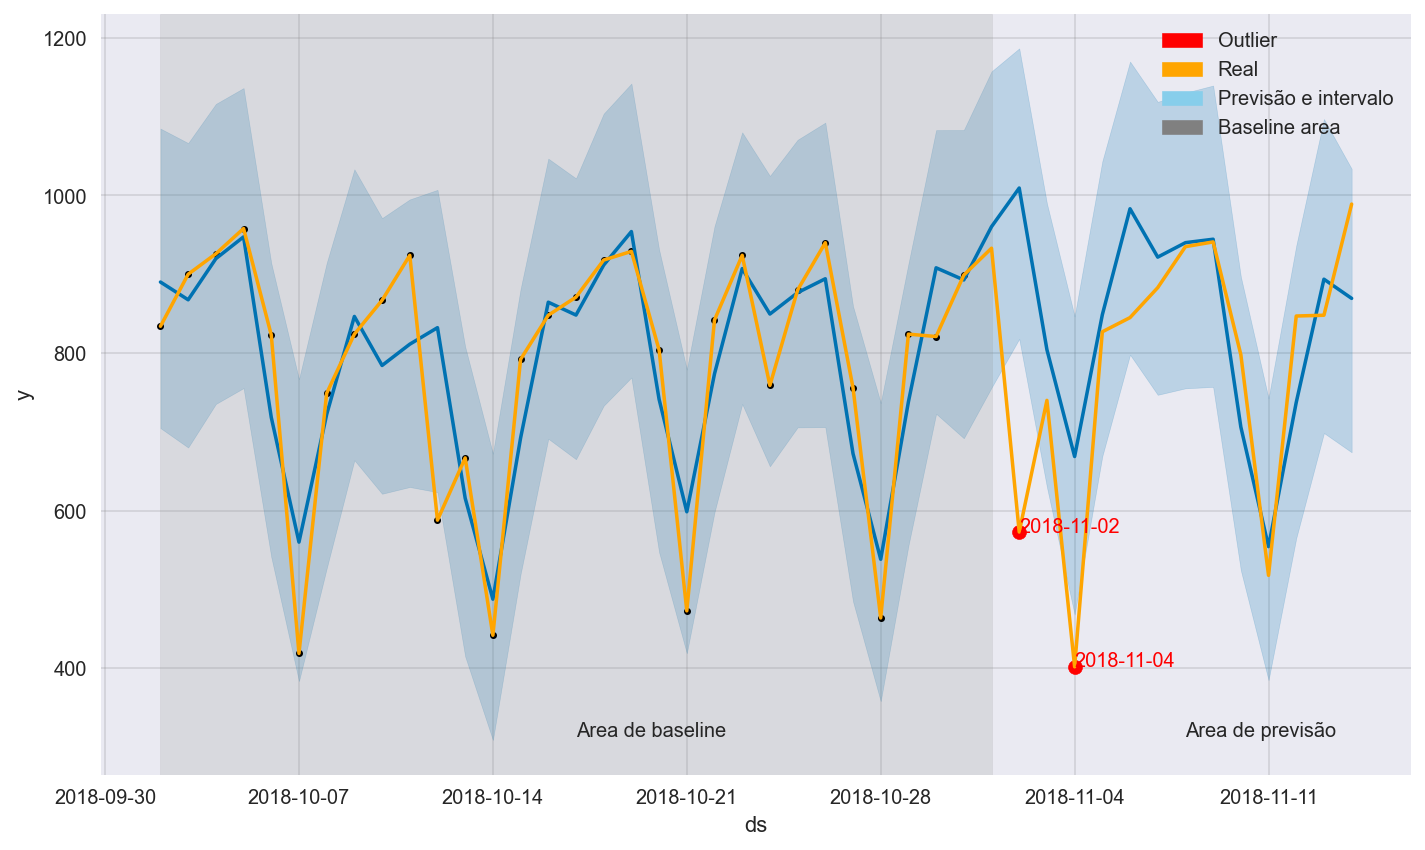

In [29]:
alpha = 0.98
mdl_prophet = Prophet(interval_width=alpha,holidays=dtclean.get_Holiday(years=[2018,2019]))
today_index = 30
print('Cutoff date: ', df_treino_2019.index[today_index])
mdl_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=2)
mdl_prophet.add_seasonality(name='weekly', period=7, fourier_order=2, prior_scale=0.1)
predict_n = 14
fig, forecast, mdl_prophet = prophet_fit(df_treino_2019, mdl_prophet, today_index, predict_days=predict_n)
outliers, df_pred = get_outliers(df_treino_2019, forecast, today_index, predict_days=predict_n)
prophet_plot(df_treino_2019, fig, today_index, predict_days=predict_n, outliers=outliers)


In [30]:
print('Previsões')
print(df_pred.head())
df_outlier = df_pred[(df_pred.actual > df_pred.upper_y) | (df_pred.actual < df_pred.lower_y)]
print('Outliers')
print(df_outlier.head())

Previsões
                   ds        preds     lower_y      upper_y  actual
2018-11-01 2018-11-01   960.334910  756.115523  1157.289144     933
2018-11-02 2018-11-02  1009.372795  817.999610  1186.521515     573
2018-11-03 2018-11-03   804.302260  630.017077   989.732719     740
2018-11-04 2018-11-04   668.754414  468.317021   846.574530     402
2018-11-05 2018-11-05   848.608234  669.283084  1043.338323     827
Outliers
                   ds        preds     lower_y      upper_y  actual
2018-11-02 2018-11-02  1009.372795  817.999610  1186.521515     573
2018-11-04 2018-11-04   668.754414  468.317021   846.574530     402


In [31]:
holiday_2018_2019=dtclean.get_Holiday(years=[2018,2019])
holiday_2018_2019['day of week']=holiday_2018_2019['ds'].dt.day_name()
holiday_2018_2019.head(30)



ds      holiday day of week
0  2018-01-01  BR-Holidays      Monday
1  2018-02-13  BR-Holidays     Tuesday
2  2018-02-14  BR-Holidays   Wednesday
3  2018-03-30  BR-Holidays      Friday
4  2018-04-01  BR-Holidays      Sunday
5  2018-04-21  BR-Holidays    Saturday
6  2018-05-01  BR-Holidays     Tuesday
7  2018-05-31  BR-Holidays    Thursday
8  2018-07-09  BR-Holidays      Monday
9  2018-09-07  BR-Holidays      Friday
10 2018-10-12  BR-Holidays      Friday
11 2018-11-02  BR-Holidays      Friday
12 2018-11-15  BR-Holidays    Thursday
13 2018-12-25  BR-Holidays     Tuesday
14 2019-01-01  BR-Holidays     Tuesday
15 2019-03-05  BR-Holidays     Tuesday
16 2019-03-06  BR-Holidays   Wednesday
17 2019-04-19  BR-Holidays      Friday
18 2019-04-21  BR-Holidays      Sunday
19 2019-05-01  BR-Holidays   Wednesday
20 2019-06-20  BR-Holidays    Thursday
21 2019-07-09  BR-Holidays     Tuesday
22 2019-09-07  BR-Holidays    Saturday
23 2019-10-12  BR-Holidays    Saturday
24 2019-11-02  BR-Holidays    Saturday
25 2019-11-15  BR-Holidays      Friday
26 2019-12-25  BR-Holidays   Wednesday